# Buyer Inquiries EDA

In [1]:
import pandas as pd
import numpy as np

path = 'C:/Users/2093/Desktop/Data Center/03. Data/05. TAITRA/FCRM/data/'
output_path = 'C:/Users/2093/Desktop/Data Center/10. 商機媒合/'
df = pd.read_csv(path + 'inquiry_utf8.csv')

def parse_date_column(s):
    """Take a Series and return a datetime-parsed Series."""
    
    dates = s.str.extract(r'(\d{2})-(\d{1,2})月 *-(\d{2})', expand=True)
    nineties = dates.iloc[:, 2].str.contains(r'8\d{1}|9\d{1}', na=False)
    millennium = dates.iloc[:, 2].str.contains(r'0\d{1}|1\d{1}', na=False)
    dates.loc[nineties, 2] = '19' + dates.loc[nineties, 2]
    dates.loc[millennium, 2] = '20' + dates.loc[millennium, 2]
    dates = pd.to_datetime(dates[0] + '-' + dates[1] + '-' + dates[2], format='%d-%m-%Y')
    return dates

for col in ['CREATION_DATE', 'LAST_UPDATE_DATE', 'PASSED_DATE']:
    df[col] = parse_date_column(df[col])

C:\Users\2093\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,10,14,15,16,17,18,25,26,28,30,34,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Part 1: Overall Statistics

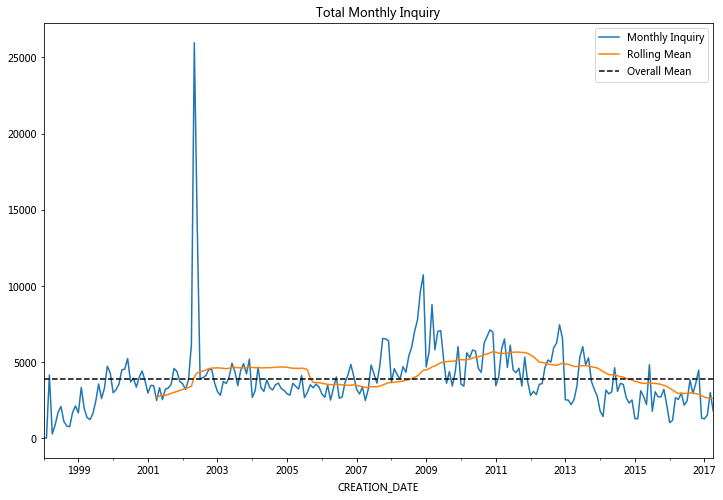

,1,0
OID,171,100.000000
CREATION_DATE,1999-08-27 00:00:00,100.000000
PRODUCT_CATEGORY_OID,950,100.000000
STATUS,PUBLISH,100.000000
COMPANY_OID,39475,99.985813
PRODUCT_NAME,Women's or girls' garments.,99.965973
CREATION_DEPT_OID,NY,99.902130
LAST_UPDATE_DATE,2000-01-01 00:00:00,99.738312
OFFER_EXPIRATION_DATE,27-11月-99,99.690874
VERIFY_YN,Y,99.556871


In [2]:
import matplotlib.pyplot as plt

monthly_inq = df.set_index('CREATION_DATE').loc['1998':, 'OID'].resample('M').count()

plt.figure(figsize=(12, 8))
monthly_inq.plot()
monthly_inq.rolling(window=40).mean().plot()
plt.axhline(monthly_inq.mean(), color='k', linestyle='dashed')
plt.title('Total Monthly Inquiry')
plt.legend(['Monthly Inquiry', 'Rolling Mean', 'Overall Mean'])
plt.savefig(output_path + 'monthly_inq.jpg', dpi=300)
plt.show()

(pd.concat([df.fillna(method='bfill').iloc[1, :], df.notnull().sum() / len(df) * 100], axis=1)
 .sort_values(0, ascending=False))

## Part 2: Source Breakdown

In [3]:
dept = pd.read_csv('C:/Users/2093/Desktop/Data Center/03. Data/05. TAITRA/FCRM/department.csv')
df = df.merge(dept, left_on='CREATION_DEPT_OID', right_on='DEPTID')

ttc = (r'.*台灣貿易中心.*|.*臺灣貿易中心.*|.*台貿中心.*|.*台北貿易中心.*|.*駐留辦公室.*|.*駐留辦事處.*|'
       + '.*[^化岸]辦事處$')  # exclude 台北經濟文化辦事處, 遠東貿易服務中心駐象牙海岸辦事處
gov = (r'.*大使館.*|.*代表處經濟組.*|.*辦事處經濟組.*|.*辦事處商務組.*|.*服務處.*|.*商務組.*|'
       + '.*台北經濟文化辦事處.*|遠東貿易服務中心駐象牙海岸辦事處')
nc = r'.*網路行銷中心.*'
md = r'.*市場開發處.*|.*市場拓展處.*|.*貿易尖兵.*'
sm = r'.*行銷專案處.*'
ed = r'.*展覽業務處.*'
pf = r'.*企劃財務處.*'
it = r'.*資訊及數據中心.*'

df['dept_ctgy'] = df['NAME'].replace(
    [ttc, gov, nc, md, sm, ed, pf, it],
    ['台灣貿易中心', '經濟組', '網路中心', '拓展處', '行銷處', '展覽處', '企財處', '數據中心'],
    regex=True)

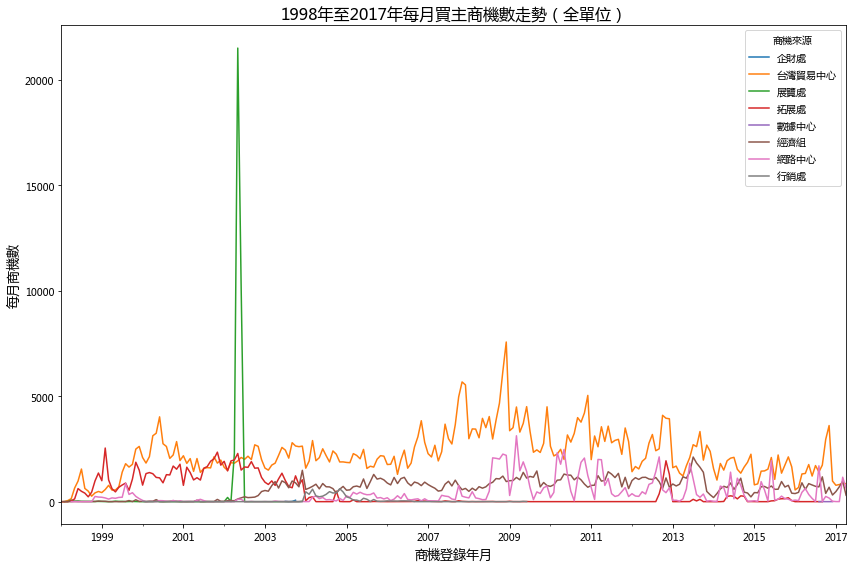

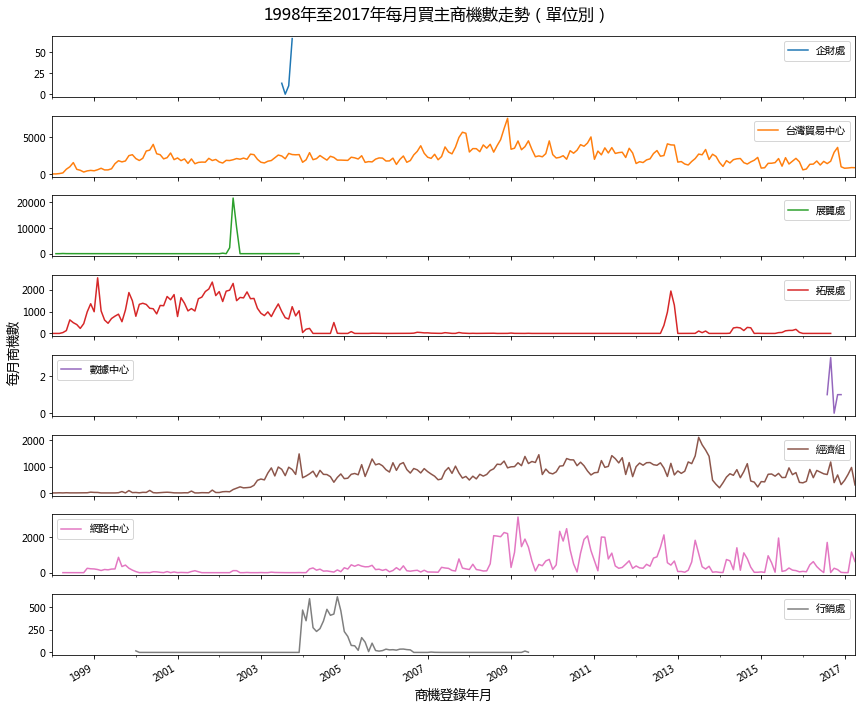

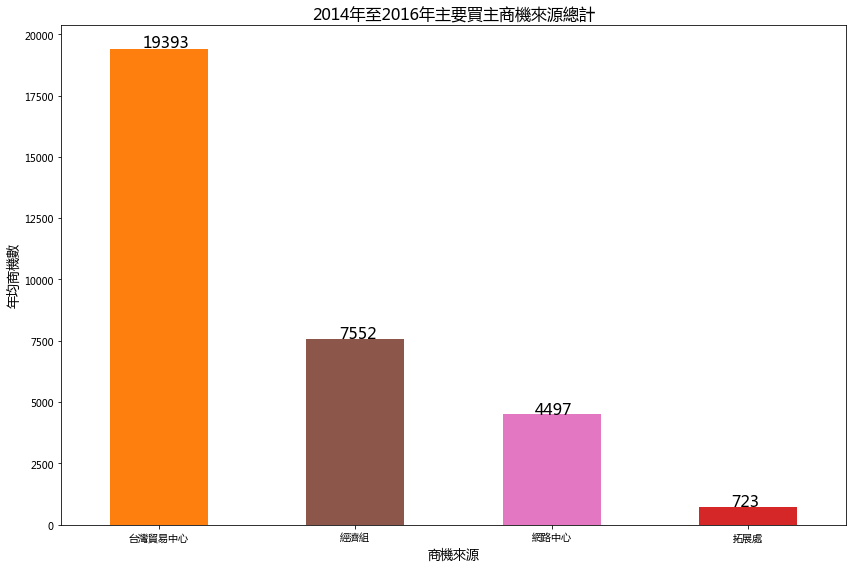

In [4]:
dept_cnt = (df.set_index('CREATION_DATE').groupby('dept_ctgy')['OID'].resample('M').count()
            .unstack('dept_ctgy').loc['1998':])

dept_cnt.plot(kind='line', figsize=(12, 8))
plt.title('1998年至2017年每月買主商機數走勢（全單位）', fontsize=16)
plt.xlabel('商機登錄年月', fontsize=13)
plt.ylabel('每月商機數', fontsize=13)
plt.legend(title='商機來源')
plt.tight_layout()
plt.savefig(output_path + 'monthly_inq_dept.jpg', dpi=300)
plt.show()

ax = dept_cnt.plot(kind='line', figsize=(12, 10), subplots=True)
plt.suptitle('1998年至2017年每月買主商機數走勢（單位別）', fontsize=16)
plt.xlabel('商機登錄年月', fontsize=13)
fig = ax[0].figure
fig.text(0.01, 0.5, '每月商機數', fontsize=13, ha='center', va='center', rotation=90)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.savefig(output_path + 'monthly_inq_dept_facet.jpg', dpi=300)
plt.show()

dept_mean = (df.set_index('CREATION_DATE').groupby('dept_ctgy')['OID'].resample('A').count()
             .unstack('dept_ctgy').loc['2014':'2016'].mean().sort_values(ascending=False).dropna().head(4))

fig, ax = plt.subplots()
dept_mean.plot(kind='bar', color=['C1', 'C5', 'C6', 'C3'], figsize=(12, 8), ax=ax)
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 3, p.get_height() * 1.005),
                fontsize=16)
plt.title('2014年至2016年主要買主商機來源總計', fontsize=16)
plt.xlabel('商機來源', fontsize=13)
plt.ylabel('年均商機數', fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(output_path + 'main_inq_source.jpg', dpi=300)
plt.show()

In [5]:
from math import ceil

n_original = len(df)
df = df[df['dept_ctgy'].isin(['台灣貿易中心', '經濟組'])]
print('Removed {:,} inquiries not coming from delegations. {:,} inquiries remain.'
     .format(n_original - len(df), len(df)))

df = df[['CREATION_DATE', 'PRODUCT_CATEGORY_OID', 'COMPANY_OID', 'PRODUCT_NAME', 'CREATION_DEPT_OID',
         'SPECIFICATION']]
df.columns = ['creation_date', 'code_val', 'buyer_id', 'prod_name', 'dept', 'prod_desc']

df = df[df['buyer_id'].notnull()]
assert df['buyer_id'].isnull().sum() == 0
df['buyer_id'] = df['buyer_id'].astype(int)

def conditional_zfill(x):
    return str(x).zfill(ceil(len(str(x))/2) * 2)

df['code_val'] = df['code_val'].apply(conditional_zfill)
df['dept'] = df['dept'].astype('category')

df.to_csv(path + 'inquiry_compressed.csv', index=False, encoding='utf-8')

Removed 223,826 inquiries not coming from delegations. 672,024 inquiries remain.


## Part 3: Product Category Breakdown

In [6]:
import os
import re

def build_taitra_code_mapping():
    ctgy_path = 'C:/Users/2093/Desktop/Data Center/10. 商機媒合/taitra_code_category/'
    categories = pd.DataFrame()
    for fname in os.listdir(ctgy_path):
        label = re.search('(.*).txt', fname).group(1)
        with open(ctgy_path + fname, encoding='utf-8') as f:
            txt = f.read()
        parsed = pd.DataFrame(dict(ctgy=label), index=re.findall(r'□(\d{4})', txt))
        categories = categories.append(parsed)
    categories.index.name = 'code_val'
    categories.to_csv(output_path + 'taitra_code_ctgy_mapping.csv', encoding='utf-8')
    return

# build_taitra_code_mapping()
ctgy_map = pd.read_csv(output_path + 'taitra_code_ctgy_mapping.csv', index_col=0,
                       encoding='utf-8', engine='python')
ctgy_map.index = ctgy_map.index.astype(str)

In [7]:
def build_old_new_mapping():
    old_new = pd.read_excel(output_path + '複本 新舊碼對照表+新碼總表0807.xlsx')[['原代碼', '新代碼']]
    old_new.columns = ['old', 'new']
    old_new['old'] = old_new['old'].astype(str).apply(conditional_zfill)
    old_new.set_index('old', inplace=True)
    old_new.to_csv(output_path + 'old_new_mapping.csv', encoding='utf-8')
    return

# build_old_new_mapping()
old_new = pd.read_csv(output_path + 'old_new_mapping.csv', index_col=0, encoding='utf-8',
                      engine='python')
old_new.index = old_new.index.astype(str)
old_new['new'] = old_new['new'].astype(str)

In [8]:
# Data from last five years
five = df[(df['creation_date'].dt.year >= 2012) & (df['creation_date'].dt.year <= 2016)].copy()
five = five[five['code_val'].str.len() == 4]

# Old TAITRA code --> new TAITRA code
five = five.merge(old_new, left_on='code_val', right_index=True, how='left')

five_succ = five.dropna(subset=['new'])
five_fail = five[five['new'].isnull()]

# If a code fails to map to any new code, then it is either:
#   1) a new code itself --> simply copy to the new code column; or
five_new_code = five_fail[five_fail['code_val'].apply(lambda x: int(x[:2]) >= 51)].copy()
five_new_code['new'].fillna(five_new_code['code_val'], inplace=True)
#   2) not included in the old-new mapping --> remap using only two digits
five_excluded = five_fail[five_fail['code_val'].apply(lambda x: int(x[:2]) < 51)].copy()
five_excluded['code_val'] = five_excluded['code_val'].str.slice(0, 2)
five_excluded = (five_excluded.drop('new', axis=1)
                 .merge(old_new, left_on='code_val', right_index=True, how='left'))
five = five_succ.append(five_new_code).append(five_excluded)

# New TAITRA code --> category
five = five.merge(ctgy_map, left_on='new', right_index=True, how='left')

In [9]:
five_succ = five.dropna(subset=['ctgy'])
five_fail = five[five['ctgy'].isnull()].copy()

five_fail['new'] = five_fail['new'].str.slice(0, 2)

ctgy_map_2 = ctgy_map.reset_index()
ctgy_map_2['code_val'] = ctgy_map_2['code_val'].str.slice(0, 2)
ctgy_map_2 = ctgy_map_2.drop_duplicates().set_index('code_val')

# New TAITRA code (2 digits) --> category
five_fail = (five_fail.drop('ctgy', axis=1)
             .merge(ctgy_map_2, left_on='new', right_index=True, how='left'))

# Currently codes 71, 72, 81 are not assigned any category
five_fail.loc[five_fail['ctgy'].isnull(), 'ctgy'] = '其他產品'

five = five_succ.append(five_fail)

#### 3.1 Weekly Time Series

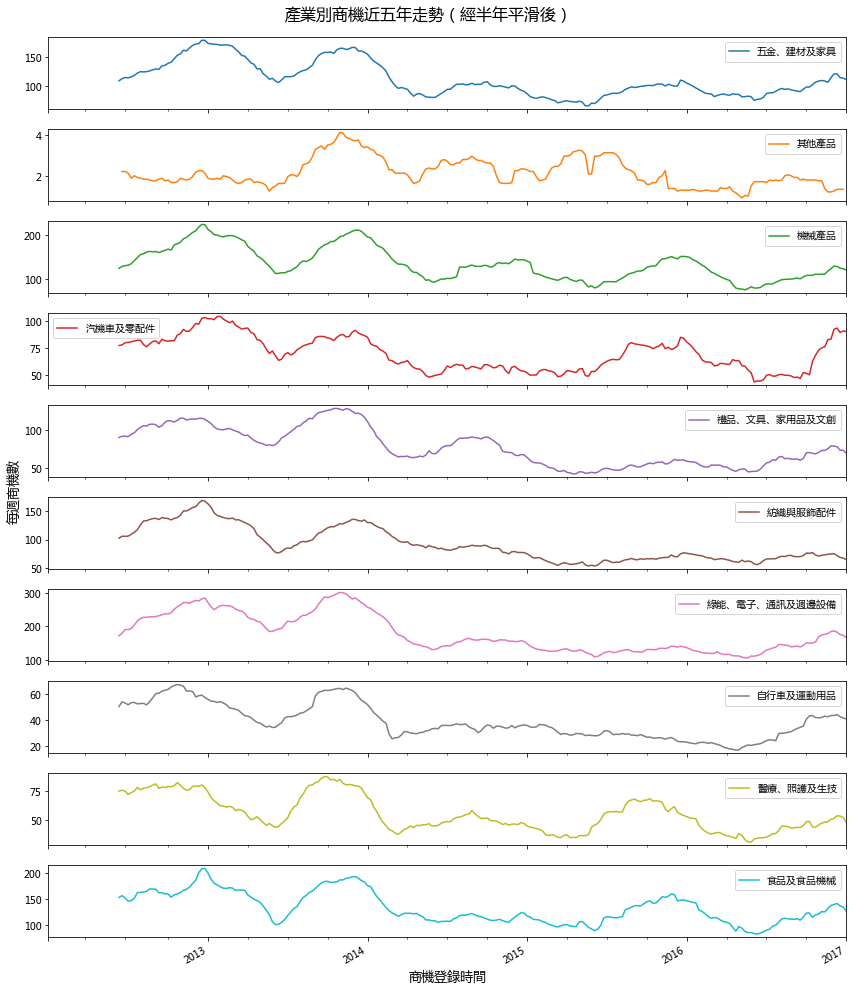

In [10]:
ctgy_cnt_week = (five.set_index('creation_date').groupby('ctgy')['buyer_id']
                .resample('W').count().unstack('ctgy'))
# ctgy_cnt_day = (five.set_index('creation_date').groupby('ctgy')['buyer_id']
#                 .resample('D').count().unstack('ctgy'))

ax = ctgy_cnt_week.rolling(window=24).mean().plot(subplots=True, figsize=(12, 14))
#ax = ctgy_cnt_day.rolling(window=90).mean().plot(subplots=True, figsize=(12, 14))
plt.suptitle('產業別商機近五年走勢（經半年平滑後）', fontsize=16)
plt.xlabel('商機登錄時間', fontsize=13)
fig = ax[0].figure
fig.text(0.02, 0.5, '每週商機數', fontsize=13, ha='center', va='center', rotation=90)
plt.tight_layout()
plt.subplots_adjust(top=0.95, left=0.06)
plt.savefig(output_path + 'ctgy_weekly_ts.jpg', dpi=300)
plt.show()

#### 3.2 Calendar Heatmap

C:\Users\2093\AppData\Local\Continuum\Anaconda3\lib\site-packages\calmap\__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
C:\Users\2093\AppData\Local\Continuum\Anaconda3\lib\site-packages\calmap\__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


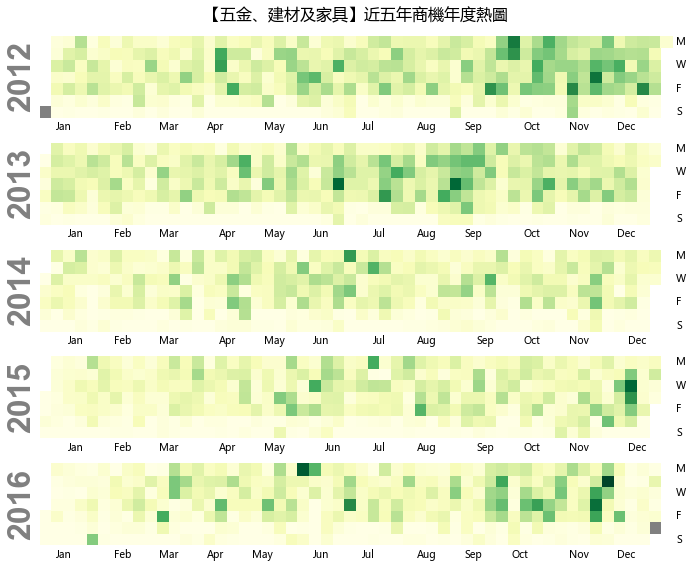

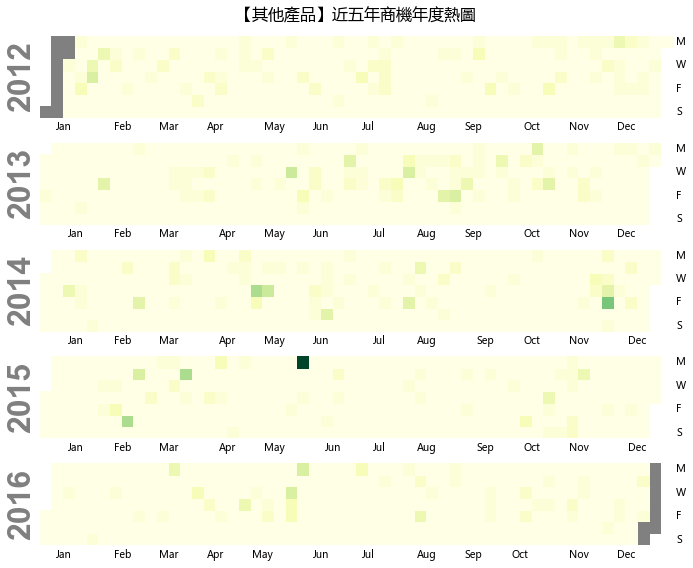

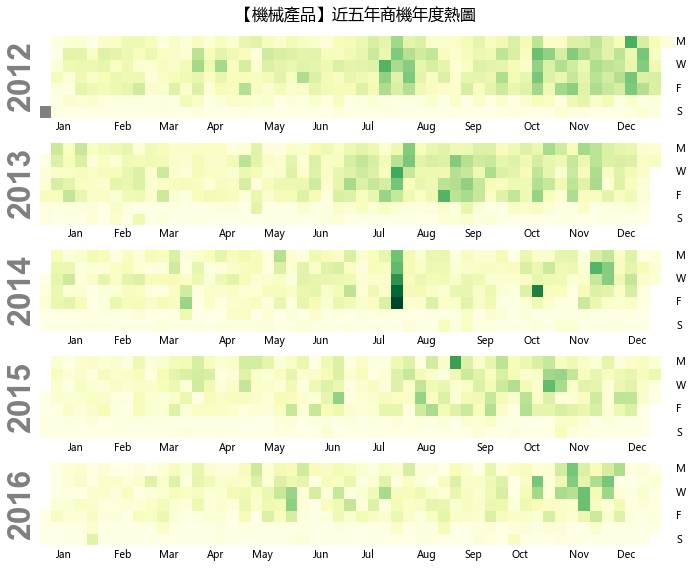

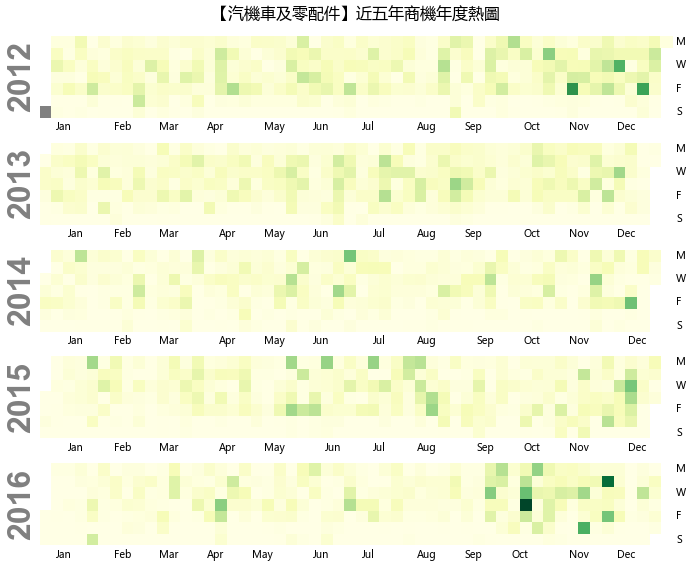

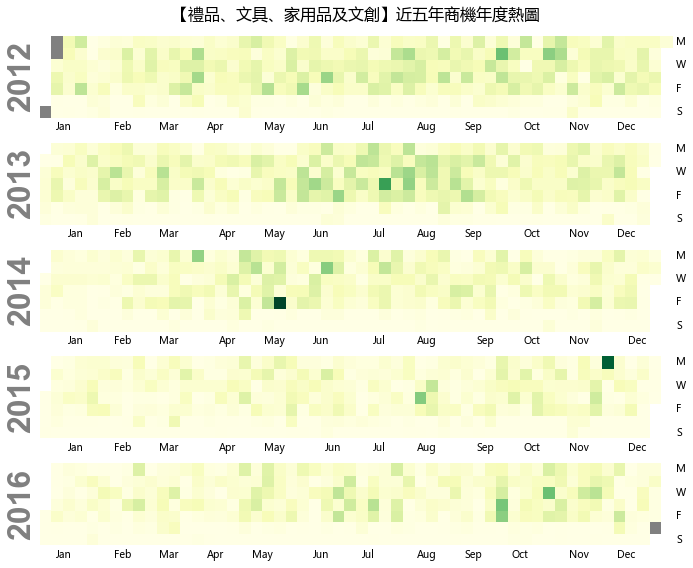

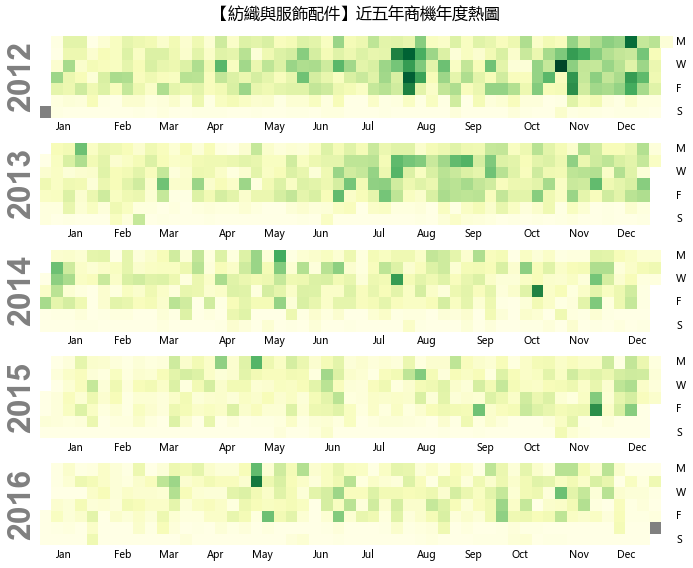

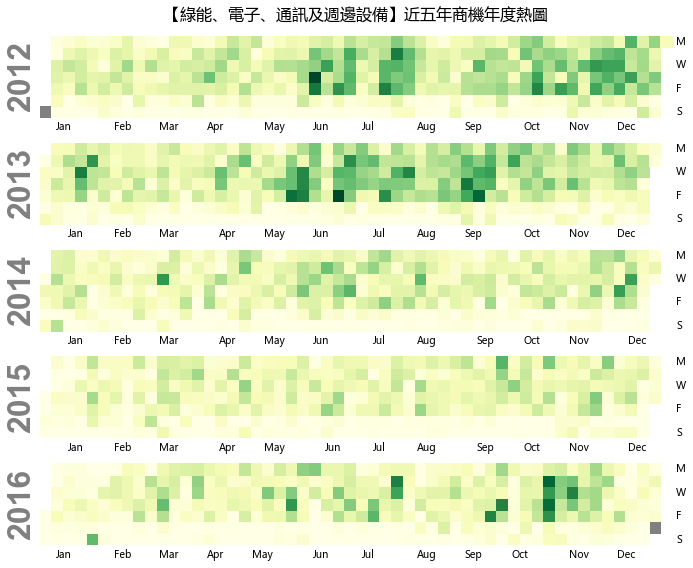

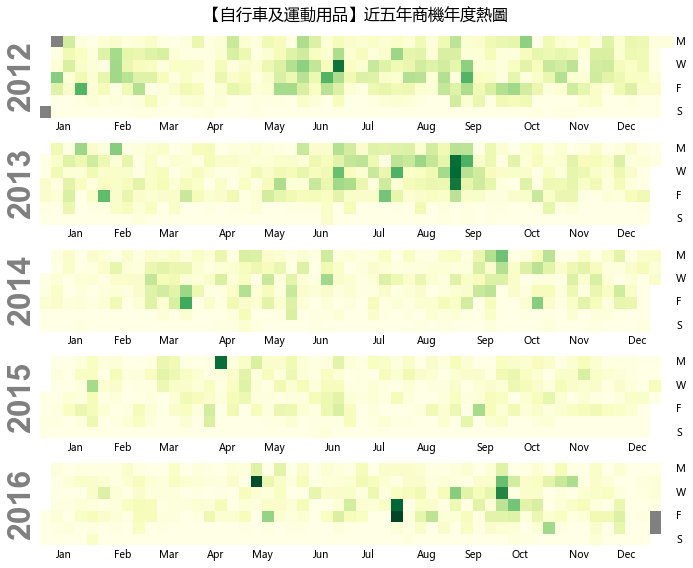

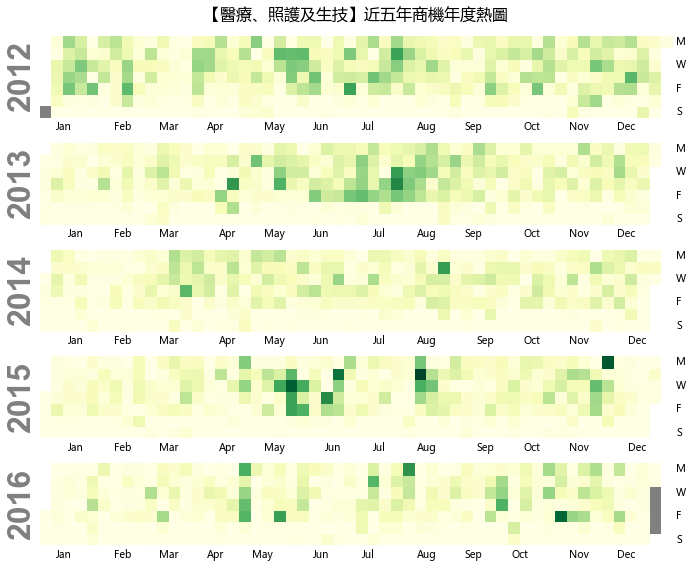

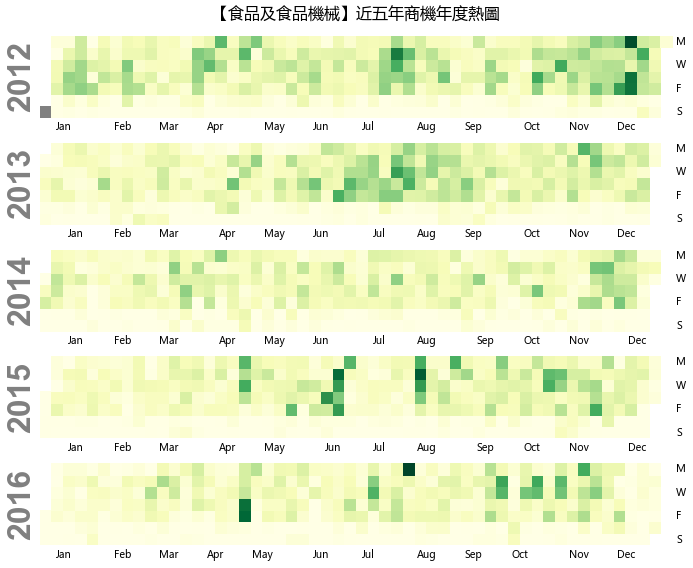

In [11]:
import calmap

ctgy_cnt_day = (five.set_index('creation_date').groupby('ctgy')['buyer_id']
                .resample('D').count().unstack('ctgy'))

def plot_calendar(s, cmap='YlGn'):
    fname = s.name
    calmap.calendarplot(s, daylabels='MTWTFSS', dayticks=[0, 2, 4, 6], cmap=cmap,
                        fillcolor='grey', linewidth=0, fig_kws=dict(figsize=(12, 8)))
    plt.suptitle('【' + fname + '】近五年商機年度熱圖', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.savefig(output_path + fname + '.jpg', dpi=300)
    plt.show()
    return

for c in ctgy_cnt_day.columns:
    plot_calendar(ctgy_cnt_day[c])

#### 3.3 Weekly Time Series, Smoothed

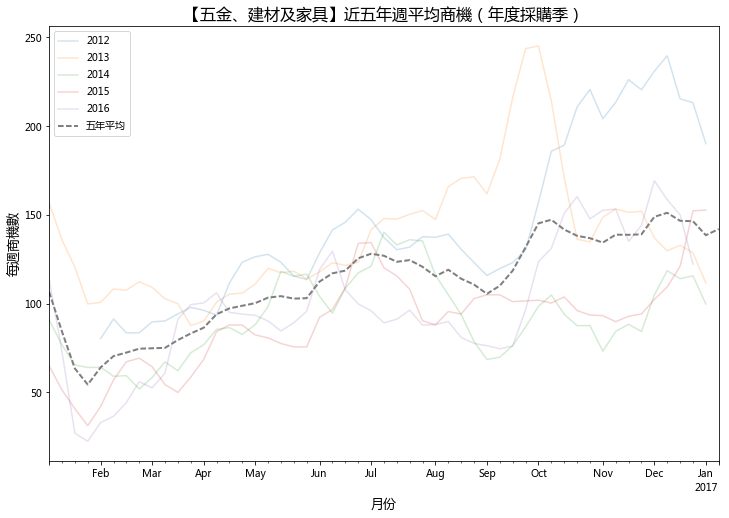

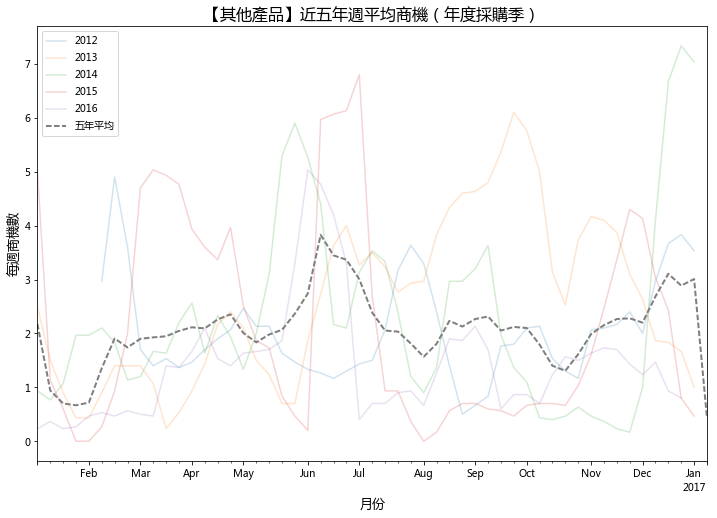

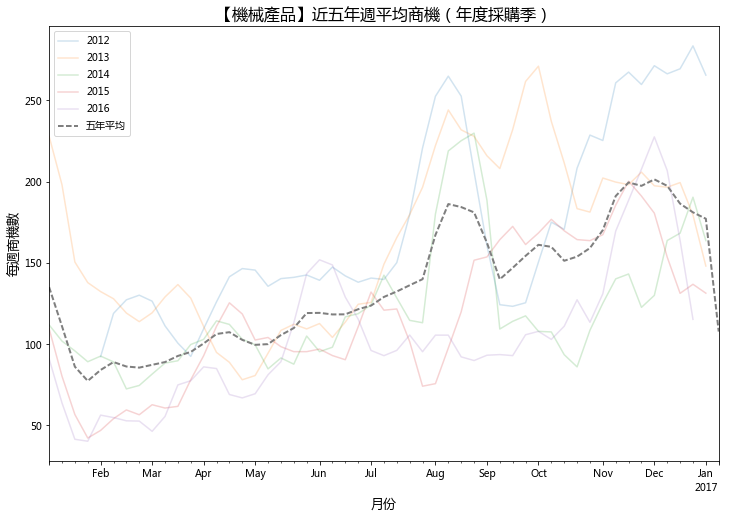

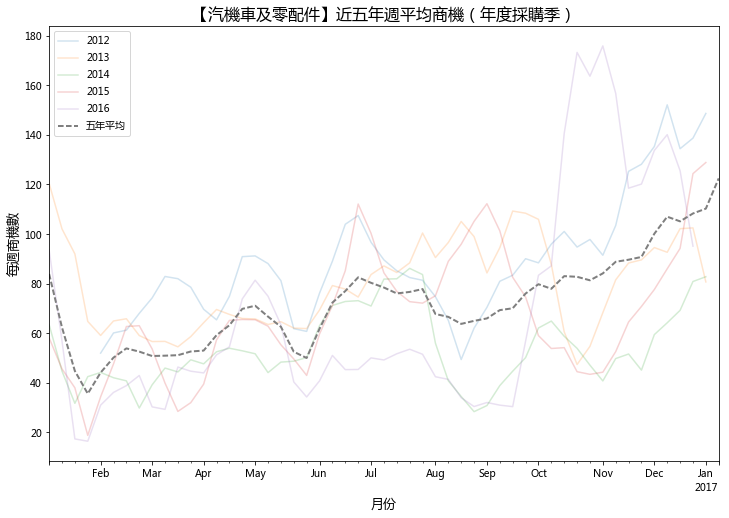

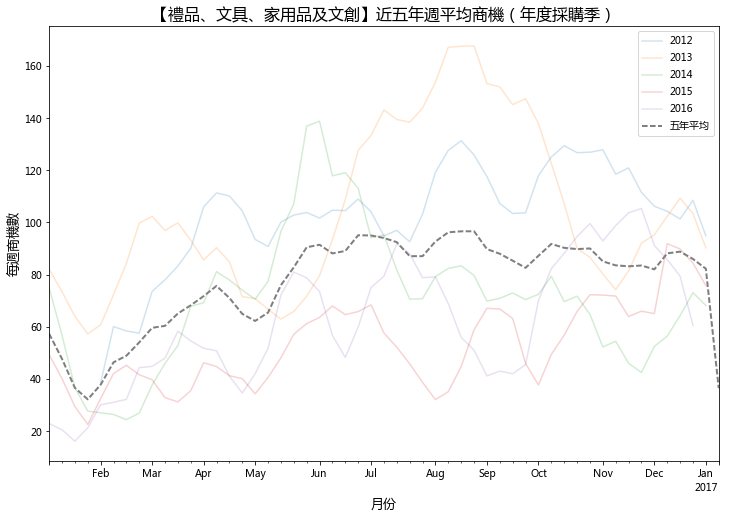

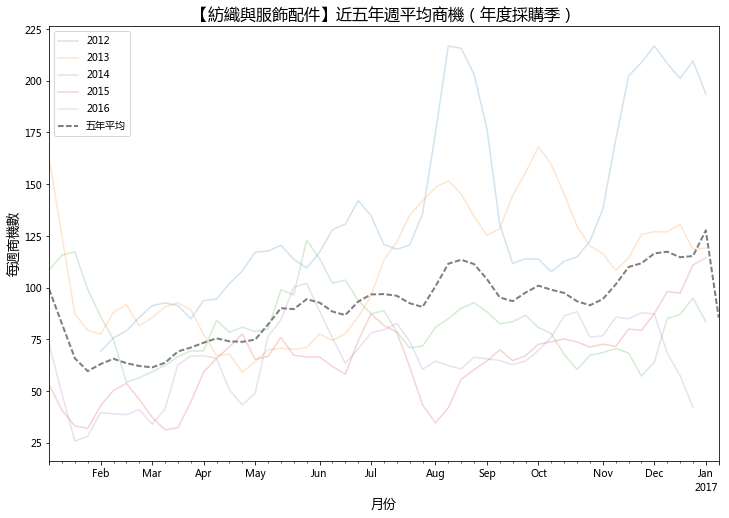

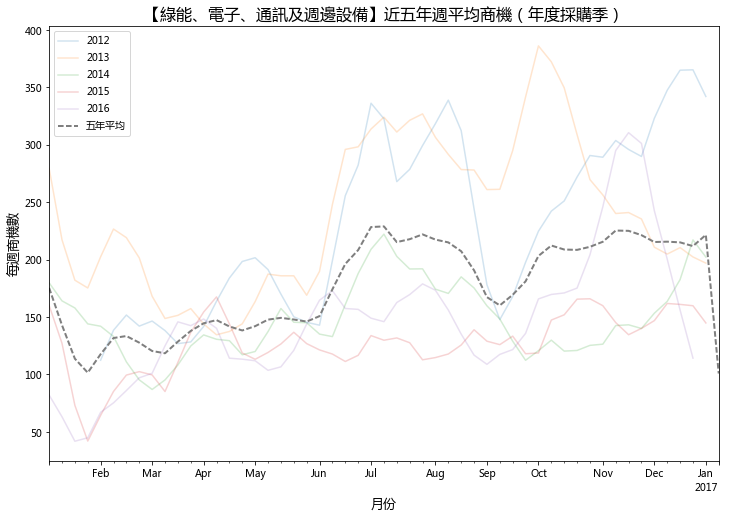

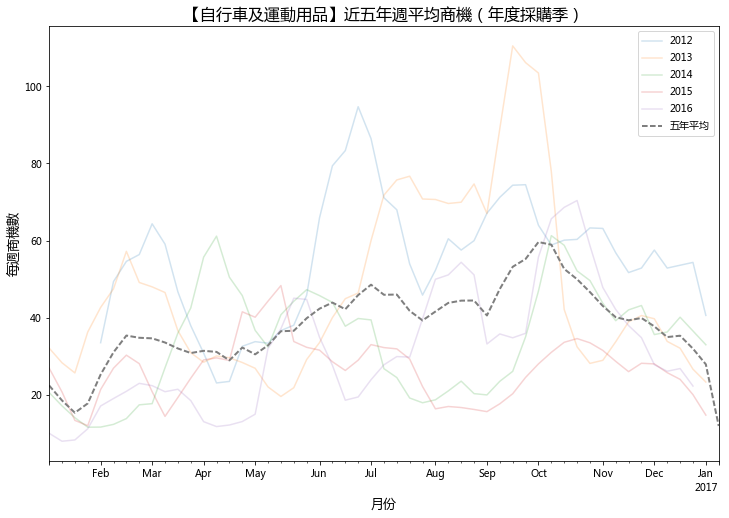

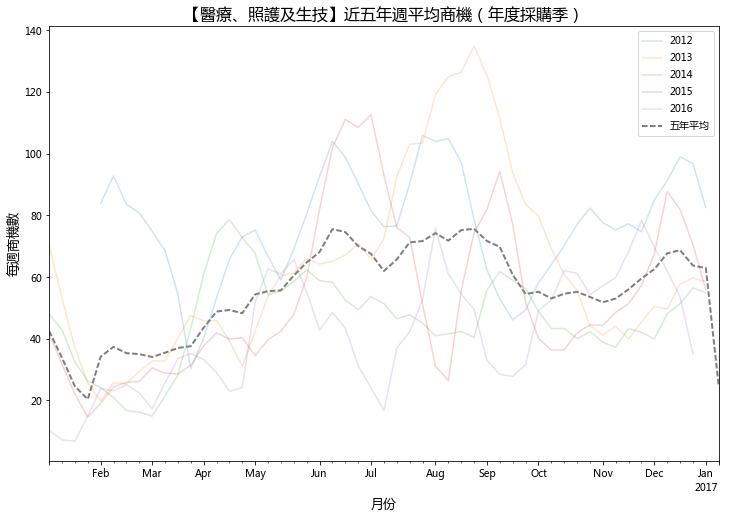

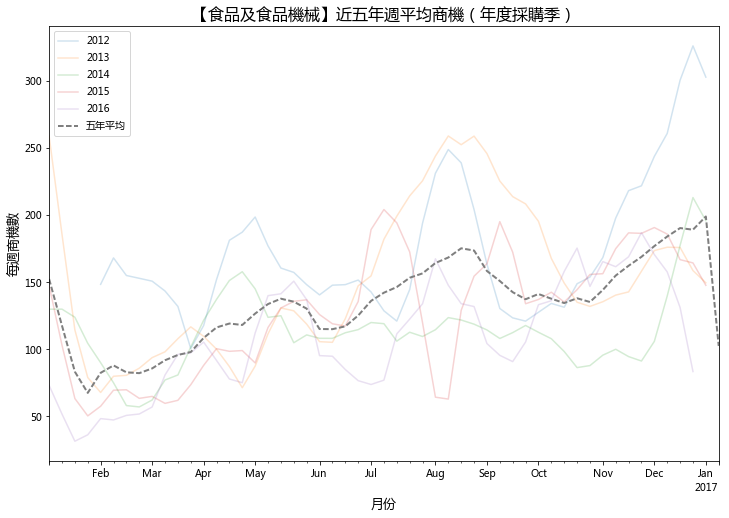

In [12]:
import datetime

ctgy_cnt_smoothed_week = ctgy_cnt_day.rolling(window=30).mean().resample('W').sum().loc[:'2016']

def smoothed_line(df):
    fname = df.columns[0]
    df = df.copy()
    df['year'] = df.index.year
    df['week'] = df.index.week
    pivoted = df.pivot(index='week', columns='year', values=fname)
    pivoted.index = [datetime.datetime.strptime('2016-W' + str(d) + '-0', '%Y-W%W-%w')
                     for d in pivoted.index]
    fig, ax = plt.subplots()
    pivoted.plot(alpha=0.2, ax=ax, figsize=(12, 8))
    pivoted.mean(axis=1).plot(ax=ax, color='C7', linestyle='dashed', linewidth=2)
    ax.legend(loc='upper left')
    plt.title('【' + fname + '】近五年週平均商機（年度採購季）', fontsize=16)
    plt.xlabel('月份', fontsize=13)
    plt.ylabel('每週商機數', fontsize=13)
    plt.legend(['2012', '2013', '2014', '2015', '2016', '五年平均'])
    plt.savefig(output_path + fname + '_smoothed.jpg', dpi=300)
    plt.show()
    return

for c in ctgy_cnt_smoothed_week.columns:
    smoothed_line(ctgy_cnt_smoothed_week[[c]])

## Part 4: Number of Matched Catalogue Items

In [13]:
ctlg = pd.read_csv('C:/Users/2093/Desktop/Data Center/03. Data/05. TAITRA/TT/processed_ctlg.csv',
                   encoding='utf-8', parse_dates=['mod_date'])
ctlg['code_val'] = ctlg['code_val'].astype(str).str.zfill(6).astype('category')

In [14]:
%%time

def get_matches_by_code(code):
    items = ctlg[ctlg['code_val'].str.contains(r'^' + code, na=False)]
    n_supp = items['ban'].nunique()
    return len(items), n_supp

inq16 = df[df['creation_date'].dt.year == 2016]
match_dist = [get_matches_by_code(c) for c in inq16['code_val']]
item_dist = [i for i, s in match_dist]
supp_dist = [s for i, s in match_dist]

Wall time: 4min 3s


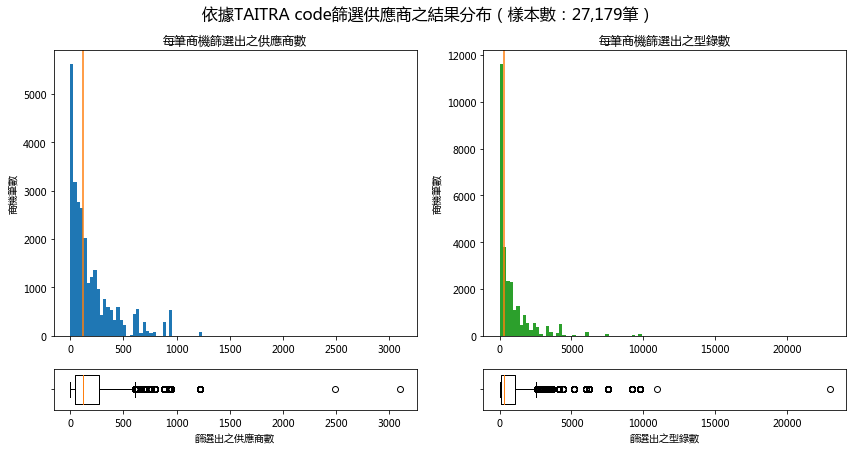

若單純以TAITRA code為標準，多數情況下，每筆商機可篩選出42至268家供應商（80至1,065張型錄），中位數為117家供應商（332張型錄）。


In [15]:
from matplotlib import gridspec

plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[7, 1])
plt.suptitle('依據TAITRA code篩選供應商之結果分布（樣本數：{:,}筆）'
             .format(len(inq16)), fontsize=16, y=1.04)

plt.subplot(gs[0])
plt.hist(supp_dist, bins=100)
plt.axvline(x=np.median(supp_dist), color='C1')
plt.title('每筆商機篩選出之供應商數')
plt.ylabel('商機筆數')

plt.subplot(gs[1])
plt.hist(item_dist, bins=100, color='C2')
plt.axvline(x=np.median(item_dist), color='C1')
plt.title('每筆商機篩選出之型錄數')
plt.ylabel('商機筆數')

plt.subplot(gs[2])
plt.boxplot(supp_dist, vert=False, widths=0.7, labels=' ')
plt.xlabel('篩選出之供應商數')

plt.subplot(gs[3])
plt.boxplot(item_dist, vert=False, widths=0.7, labels=' ')
plt.xlabel('篩選出之型錄數')

plt.tight_layout()
plt.savefig(output_path + 'supp_match_distribution.jpg', dpi=300, bbox_inches='tight')
plt.show()

print('若單純以TAITRA code為標準，多數情況下，每筆商機可篩選出{:.0f}至{:.0f}家供應商\
（{:.0f}至{:,.0f}張型錄），中位數為{:.0f}家供應商（{:.0f}張型錄）。'
      .format(np.percentile(supp_dist, 25), np.percentile(supp_dist, 75),
              np.percentile(item_dist, 25), np.percentile(item_dist, 75),
              np.median(supp_dist), round(np.median(item_dist))))